# Model Using Gradient boosted tree classifier

## Packages used

In [6]:
import pandas as pd
import turicreate 
import matplotlib.pyplot as plt
import turicreate_cross_validation.cross_validation as tcv
import numpy as np

%matplotlib inline

In [7]:
from turicreate import SFrame

## Loading Data

Dataset has been taken from Kaggle provided by University of Wisconsin.

In [8]:
data=turicreate.SFrame('data_cancer1.csv')

Finished parsing file /mnt/c/Users/RAJARSHI MAITY/Documents/Python/Breast Cancer/data_cancer1.csv

Parsing completed. Parsed 100 lines in 0.084267 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/c/Users/RAJARSHI MAITY/Documents/Python/Breast Cancer/data_cancer1.csv

Parsing completed. Parsed 569 lines in 0.133387 secs.

In [9]:
data=data.remove_columns(['m','n'])

In [10]:
data['diagnosis']=data['diagnosis'].apply(lambda x: 1 if x== 'M' else -1)
data

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
842302,1,17.99,10.38,122.8,1001.0,0.1184,0.2776
842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864
84300903,1,19.69,21.25,130.0,1203.0,0.1096,0.1599
84348301,1,11.42,20.38,77.58,386.1,0.1425,0.2839
84358402,1,20.29,14.34,135.1,1297.0,0.1003,0.1328
843786,1,12.45,15.7,82.57,477.1,0.1278,0.17
844359,1,18.25,19.98,119.6,1040.0,0.09463,0.109
84458202,1,13.71,20.83,90.2,577.9,0.1189,0.1645
844981,1,13.0,21.82,87.5,519.8,0.1273,0.1932
84501001,1,12.46,24.04,83.97,475.9,0.1186,0.2396


In [11]:
#Balancing the data set
target= 'diagnosis'
safe = data[data[target] == -1]
risk = data[data[target] == 1]

# Undersample the safe loans.
percentage = len(risk)/float(len(safe))
safe_x = safe.sample(percentage, seed = 1)
risk_x = risk
data = risk_x.append(safe_x)

print("Percentage of safe people                 :", len(safe_x) / float(len(data)))
print("Percentage of risk people                :", len(risk_x) / float(len(data)))
print("Total number of data point in our new dataset :", len(data))

Percentage of safe people                 : 0.4891566265060241
Percentage of risk people                : 0.5108433734939759
Total number of data point in our new dataset : 415


In [12]:
train_validation_data,test_data=data.random_split(0.8,seed=0)
train_data,validation_data=train_validation_data.random_split(0.9,seed=0)

In [13]:
main_features=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [14]:
decision_tree_model = turicreate.boosted_trees_classifier.create(train_data,
                                                                 target = 'diagnosis',validation_set=None,
                                                                 features = main_features,max_depth=6,max_iterations=10
                                                                )

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 301

Number of classes           : 2

Number of feature columns   : 30

Number of unpacked features : 30

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training Accuracy | Training Log Loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.012384     | 0.996678          | 0.460508          |

| 2         | 0.019608     | 0.996678          | 0.327262          |

| 3         | 0.025646     | 0.996678          | 0.237846          |

| 4         | 0.031143     | 0.996678          | 0.177970          |

| 5         | 0.036314     | 0.996678          | 0.135705          |

| 10        | 0.061385     | 1.000000          | 0.042566          |

+-----------+--------------+-------------------+-------------------+

In [15]:
decision_tree_model.evaluate(test_data)

{'accuracy': 0.9411764705882353,
 'auc': 0.9965034965034973,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        1        |   32  |
 |      1       |        -1       |   1   |
 |      -1      |        -1       |   48  |
 |      -1      |        1        |   4   |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.927536231884058,
 'log_loss': 0.13230072392173928,
 'precision': 0.8888888888888888,
 'recall': 0.9696969696969697,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+----+----+
 | threshold | fpr | tpr | p  | n  |
 +-----------+-----+-----+----+----+
 |    0.0    | 1.0 | 1.0 | 33 | 52 |
 |   1e-05   | 1.0 | 1.0 | 33 | 52 |
 |   2e-05   | 1.0 | 1.0 | 33 | 52 |
 |

## Conclusion:
Looking at the variation of the training accuracy it can be assumed that the model is an extremely overfit one.

Also the validation set taken into account is a very small subset of the data.Since, the data set is extremely small k-fold cross validation is applied later.

## Comparing Boosted Tree Models with different number of iterations----- part 1

### Effect of adding more trees
We will train 5 different ensemble classifiers in the form of gradient boosted trees. We will train models with 2, 5, 10 and 50 trees.  We use the **max_iterations** parameter in the boosted tree module. 

Let's get sarted with a model with **max_iterations = 2**:


A specific value of loss reduction and minimum child weight has been choosen to reduce overfitting encountered before.

In [16]:
model_2 = turicreate.boosted_trees_classifier.create(train_data,
                                                                 target = 'diagnosis',validation_set=None,
                                                                 features = main_features,max_depth=6,min_loss_reduction=5,max_iterations=2,#min_child_weight=2,
                                                                  verbose= False)
model_5 = turicreate.boosted_trees_classifier.create(train_data,
                                                                 target = 'diagnosis',validation_set=None,
                                                                 features = main_features,max_depth=6,min_loss_reduction=5,max_iterations=5,#min_child_weight=2, 
                                                     verbose=False)
model_10 = turicreate.boosted_trees_classifier.create(train_data,
                                                                 target = 'diagnosis',validation_set=None,
                                                                 features = main_features,max_depth=6,min_loss_reduction=5,max_iterations=10,#min_child_weight=2,
                                                      verbose=False)
model_50 = turicreate.boosted_trees_classifier.create(train_data,
                                                                 target = 'diagnosis',validation_set=None,
                                                                 features = main_features,max_depth=6,min_loss_reduction=5, max_iterations = 50,# min_child_weight=2,
                                                      verbose=False)

In [17]:
print (decision_tree_model.evaluate(validation_data)['accuracy'])
print (model_2.evaluate(validation_data)['accuracy'])
print (model_5.evaluate(validation_data)['accuracy'])
print (model_10.evaluate(validation_data)['accuracy'])
print (model_50.evaluate(validation_data)['accuracy'])

0.9310344827586207
0.9655172413793104
1.0
0.9655172413793104
0.9655172413793104


In [18]:
print (decision_tree_model.evaluate(test_data)['accuracy'])
print (model_2.evaluate(test_data)['accuracy'])
print (model_5.evaluate(test_data)['accuracy'])
print (model_10.evaluate(test_data)['accuracy'])
print (model_50.evaluate(test_data)['accuracy'])

0.9411764705882353
0.9529411764705882
0.9647058823529412
0.9529411764705882
0.9529411764705882


## Selecting maximum number of iterations  via cross validation
We will implement a kind of cross-validation called k-fold cross-validation. This method involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
...
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. 
To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. Turi Create has a utility function for shuffling a given SFrame. We reserve 20% of the data as the test set and shuffle the remainder. ( seed=1 is fixed to get consistent answer.)

In [19]:
(train_valid, test) = data.random_split(.8, seed=1)
train_valid_shuffled = tcv.shuffle_sframe(train_valid, random_seed=1)
train_valid_shuffled[0:10]

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
858986,1,14.25,22.15,96.42,645.7,0.1049,0.2008
896864,-1,12.98,19.35,84.52,514.0,0.09579,0.1125
8812877,1,15.75,20.25,102.6,761.3,0.1025,0.1204
899987,1,25.73,17.46,174.2,2010.0,0.1149,0.2363
902727,-1,13.28,13.72,85.79,541.8,0.08363,0.08575
927241,1,20.6,29.33,140.1,1265.0,0.1178,0.277
923465,-1,10.82,24.21,68.89,361.6,0.08192,0.06602
926125,1,20.92,25.09,143.0,1347.0,0.1099,0.2236
8811779,-1,10.2,17.48,65.05,321.2,0.08054,0.05907
8712291,-1,14.97,19.76,95.5,690.2,0.08421,0.05352


In [20]:
def k_fold_cross_validation(k, itr, data, output_name, features_list):    
    n = len(data)
    f=[]
    for i in range(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        validation_set = data[start:end+1]
        training_set = data[0:start].append(data[end+1:n])    
        model =  turicreate.boosted_trees_classifier.create(train_data,
                                                                 target = 'diagnosis',validation_set=None,
                                                                 features = main_features,max_depth=6,min_loss_reduction=5,max_iterations=itr,
                                                                  verbose= False)
        predictions = model.predict(validation_set)
        diagnosis= validation_set['diagnosis']
        num_correct = (predictions == diagnosis).sum()
        f.append(num_correct)
    accuracy_valid = sum(f) / len(train_valid_shuffled) 
    return accuracy_valid

## Comparing Boosted Tree Models with different number of iterations ---- part 2

### Effect of adding more trees
We will train 5 different ensemble classifiers in the form of gradient boosted trees. We will train models with 2, 5, 7, 10 and 50 trees.  We use the **max_iterations** parameter in the boosted tree module. 

Let's get sarted with a model with **max_iterations = 2**:


A specific value of loss reduction and minimum child weight has been choosen to reduce overfitting encountered before.

In [21]:
model_2_1=turicreate.boosted_trees_classifier.create(train_data,
                                                                 target = 'diagnosis',validation_set=None,
                                                                 features = main_features,max_depth=6,max_iterations=2,min_child_weight=2,
                                                                min_loss_reduction=0.5,
                                                                  verbose= False)

model_2_2=turicreate.boosted_trees_classifier.create(train_data,
                                                                 target = 'diagnosis',validation_set=None, min_loss_reduction=0.5,
                                                                 features = main_features,max_depth=6,max_iterations=5,min_child_weight=2,
                                                                  verbose= False)


model_2_3=turicreate.boosted_trees_classifier.create(train_data,
                                                                 target = 'diagnosis',validation_set=None, min_loss_reduction=0.5,
                                                                 features = main_features,max_depth=6,max_iterations=7,min_child_weight=2,
                                                                  verbose= False)



model_2_4=turicreate.boosted_trees_classifier.create(train_data,
                                                                 target = 'diagnosis',validation_set=None, min_loss_reduction=0.5,
                                                                 features = main_features,max_depth=6,max_iterations=10,min_child_weight=2,
                                                                  verbose= False)


model_2_5=turicreate.boosted_trees_classifier.create(train_data,
                                                                 target = 'diagnosis',validation_set=None, min_loss_reduction=0.5,
                                                                 features = main_features,max_depth=6,max_iterations=50,min_child_weight=2,
                                                                  verbose= False)



In [22]:
train_accuracy = {}
train_accuracy[2]   = model_2_1.evaluate(train_data)['accuracy']
train_accuracy[5] = model_2_2.evaluate(train_data)['accuracy']
train_accuracy[7]  = model_2_3.evaluate(train_data)['accuracy']
train_accuracy[10] = model_2_4.evaluate(train_data)['accuracy']
train_accuracy[50] = model_2_5.evaluate(train_data)['accuracy']
validation_accuracy = {}
validation_accuracy[2]   =k_fold_cross_validation(10,2, train_valid_shuffled, 'diagnosis', main_features)
validation_accuracy[5]   =k_fold_cross_validation(10,5, train_valid_shuffled, 'diagnosis', main_features)
validation_accuracy[7]  = k_fold_cross_validation(10,7, train_valid_shuffled, 'diagnosis', main_features)
validation_accuracy[10] = k_fold_cross_validation(10,10, train_valid_shuffled, 'diagnosis', main_features)
validation_accuracy[50] = k_fold_cross_validation(10,50, train_valid_shuffled, 'diagnosis', main_features)

In [23]:
train_accuracy

{2: 0.9534883720930233,
 5: 0.973421926910299,
 7: 0.9833887043189369,
 10: 0.9900332225913622,
 50: 1.0}

In [24]:
validation_accuracy

{2: 0.9614243323442137,
 5: 0.9792284866468842,
 7: 0.9703264094955489,
 10: 0.973293768545994,
 50: 0.973293768545994}

Text(0, 0.5, 'accuracy')

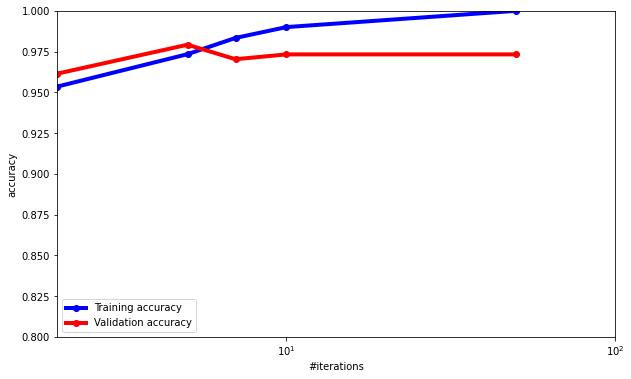

In [25]:
plt.rcParams['figure.figsize'] = 10, 6

sorted_list = sorted(train_accuracy.items(), key=lambda x:x[0])
plt.plot([p[0] for p in sorted_list], [p[1] for p in sorted_list], 'bo-', linewidth=4, label='Training accuracy')
sorted_list = sorted(validation_accuracy.items(), key=lambda x:x[0])
plt.plot([p[0] for p in sorted_list], [p[1] for p in sorted_list], 'ro-', linewidth=4, label='Validation accuracy')
plt.xscale('symlog')
plt.axis([2, 100, 0.80, 1.0])
plt.legend(loc='lower left')
plt.rcParams.update({'font.size': 18})
plt.tight_layout
plt.xlabel('#iterations')
plt.ylabel('accuracy')

In [26]:
print (decision_tree_model.evaluate(test_data)['accuracy'])
print (model_2_1.evaluate(test_data)['accuracy'])
print (model_2_2.evaluate(test_data)['accuracy'])
print (model_2_3.evaluate(test_data)['accuracy'])
print (model_2_4.evaluate(test_data)['accuracy'])

0.9411764705882353
0.9529411764705882
0.9529411764705882
0.9529411764705882
0.9411764705882353


**Observing the accuracy of different models we choose the model with max_iterations = 5.**
It is a decent model and does extremely well on the test_set.

## Visualizing Errors

In [27]:
training_error=[]
for i in train_accuracy.keys():
    training_error.append(1-train_accuracy[i])

In [28]:
training_error 

[0.046511627906976716,
 0.02657807308970095,
 0.01661129568106312,
 0.009966777408637828,
 0.0]

In [29]:
validation_error=[]
for i in validation_accuracy.keys():
    validation_error.append(1-validation_accuracy[i])

In [30]:
validation_error

[0.03857566765578635,
 0.020771513353115778,
 0.029673590504451064,
 0.02670623145400597,
 0.02670623145400597]

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

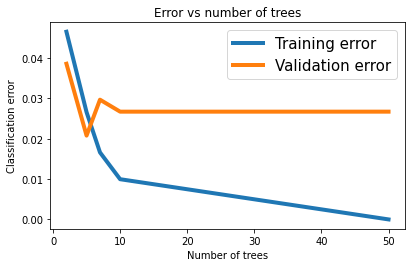

In [32]:
plt.plot([2, 5, 7, 10, 50], training_error, linewidth=4.0, label='Training error')
plt.plot([2, 5, 7, 10, 50], validation_error, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')

# Confusion Matrix

In [33]:
confusion_matrix = model_2_2.evaluate(test_data, metric='confusion_matrix')['confusion_matrix']
confusion_matrix

target_label,predicted_label,count
1,1,32
1,-1,1
-1,-1,49
-1,1,3


## Precision and Recall



$$
[\text{precision}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all data points with positive predictions]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false positives}]}
$$

In [34]:
precision = model_2_2.evaluate(test_data, metric='precision')['precision']
print ("Precision on test data: %s" % precision)

Precision on test data: 0.9142857142857143


A complementary metric i.e **recall**, which measures the ratio between the number of true positives and that of (ground-truth) positive reviews:

$$
[\text{recall}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all positive data points]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false negatives}]}
$$

Let us compute the recall on the **test_data**.

In [35]:
recall = model_2_2.evaluate(test_data, metric='recall')['recall']
print("Recall on test data: %s" % recall)

Recall on test data: 0.9696969696969697


## Precision-recall curve

Now, we will explore various different values of tresholds, compute the precision and recall scores, and then plot the precision-recall curve.

In [70]:
threshold_values = np.linspace(0.5, 1, num=100)

In [71]:
def apply_threshold(probabilities, threshold):
    ans = turicreate.SArray([+1 if x >= threshold else -1 for x in probabilities])
    return ans        

In [72]:
precision_all = []
recall_all = []

probabilities = model_2_2.predict(test_data, output_type='probability')
for threshold in threshold_values:
    predictions = apply_threshold(probabilities, threshold)
    
    precision = turicreate.evaluation.precision(test_data['diagnosis'], predictions)
    recall = turicreate.evaluation.recall(test_data['diagnosis'], predictions)
    
    precision_all.append(precision)
    recall_all.append(recall)

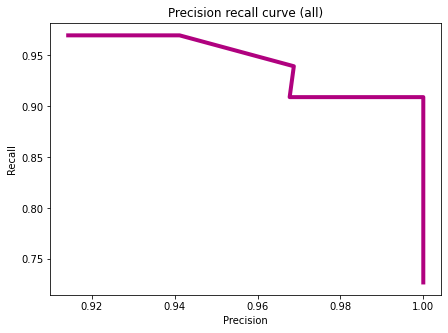

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})
    
plot_pr_curve(precision_all, recall_all, 'Precision recall curve (all)')

In [74]:
model_2_2.evaluate(train_data)

{'accuracy': 0.973421926910299,
 'auc': 0.998266204321152,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        -1       |   4   |
 |      1       |        1        |  159  |
 |      -1      |        1        |   4   |
 |      -1      |        -1       |  134  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9754601226993865,
 'log_loss': 0.17212624722528516,
 'precision': 0.9754601226993865,
 'recall': 0.9754601226993865,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+-----+
 | threshold | fpr | tpr |  p  |  n  |
 +-----------+-----+-----+-----+-----+
 |    0.0    | 1.0 | 1.0 | 163 | 138 |
 |   1e-05   | 1.0 | 1.0 | 163 | 138 |
 |   2e-05   | 1.0 | 1.0 | 163